In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

In [2]:
# load data from database
engine = create_engine('sqlite:///data/DisasterResponse.db')
df = pd.read_sql_table("data\\DisasterResponse.db", con=engine)

In [3]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df = df.iloc[:,4:]

In [5]:
df.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
def plot_top_values(top_values, title='', xlabel='', ylabel='', width=6.4, height=4.8):
    #create data frame from array of tupples
    top_pd = pd.DataFrame(top_values)
    top_pd = top_pd.sort_values(by=[1])
    ax = top_pd.plot.barh(x=0, y=1, figsize=(width, height))
    ax.legend().set_visible(False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.3, i.get_y()+.15, str(round(i.get_width(), 2))+'%', fontsize=10, color='dimgrey')
    plt.show()

In [7]:
sum_df = pd.DataFrame(df.sum())
sum_df.sort_values(by=[0], inplace=True)

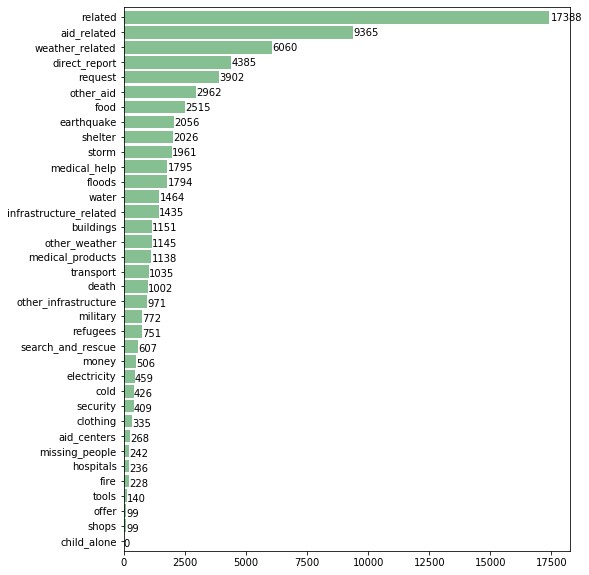

In [8]:
ax = sum_df.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85, legend=False)
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))

In [9]:
sum_df.to_csv('categories_sum.csv')

In [10]:
corr_mat = df.corr()

In [11]:
corr_mat.fillna(0, inplace=True)

In [12]:
corr_mat.to_csv('categories_corr.csv')

In [13]:
def create_corr_heatmap(corr_pd, title='', xlabel='', ylabel=''):
    cmap = sns.color_palette("coolwarm", 10)
    plt.figure(figsize=(16, 16))
    sns.heatmap(corr_pd, annot=True, fmt=".2f", center=0, square=True, cmap=cmap, vmin=-1.0, vmax=1.0)
    plt.yticks(rotation=0)
    plt.xticks(rotation=60)

    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    if title != '':
        plt.title(title)
    if xlabel != '':
        plt.xlabel(xlabel)
    if ylabel != '':
        plt.ylabel(ylabel)
    plt.show() 

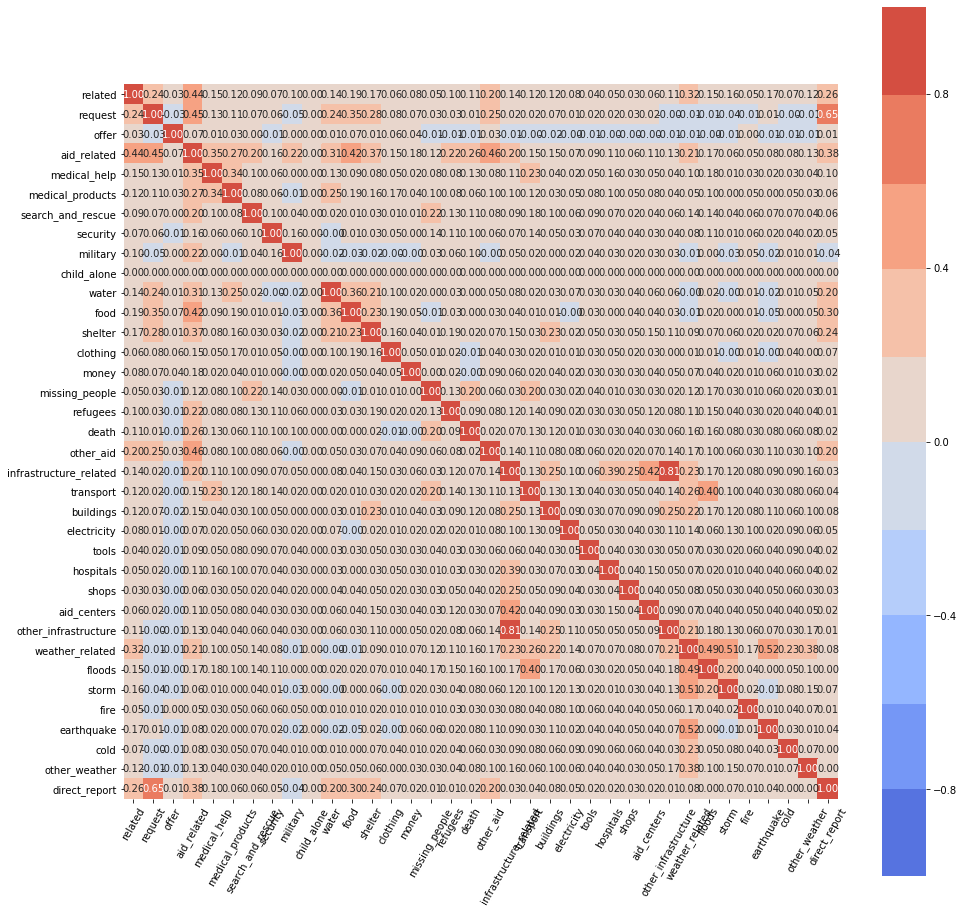

In [14]:
create_corr_heatmap(corr_mat)